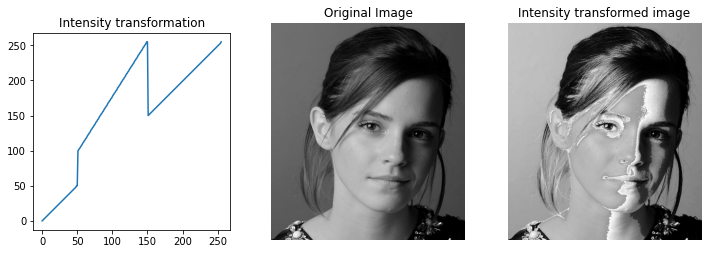

In [39]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
img= cv.imread(r'Assignment Images/emma_gray.jpg',cv.IMREAD_UNCHANGED)
assert img is not None
t1=np.linspace(0,50,50)
t2=np.linspace(50,100,1)
t3=np.linspace(100,255,99)
t4=np.linspace(255,150,1)
t5=np.linspace(150,255,105)
t=np.concatenate((t1,t2,t3,t4,t5),axis=0).astype(np.uint8)
assert len(t)==256
g=cv.LUT(img,t)
cv.namedWindow('Image',cv.WINDOW_AUTOSIZE)
cv.imshow('image',img)
cv.waitKey(0)
cv.imshow('image',g)
cv.waitKey(0)
cv.destroyAllWindows()

fig,ax=plt.subplots(1,3,figsize=(12,4))
ax[0].plot(t)
ax[0].set_title("Intensity transformation")
ax[0].set_aspect('equal')
ax[1].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[1].set_title("Original Image")
ax[2].imshow(cv.cvtColor(g, cv.COLOR_BGR2RGB))
ax[2].set_title("Intensity transformed image")
ax[1].axis('off')
ax[2].axis('off')
plt.show()

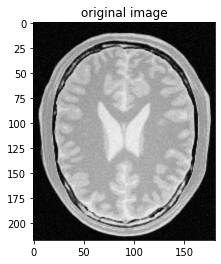

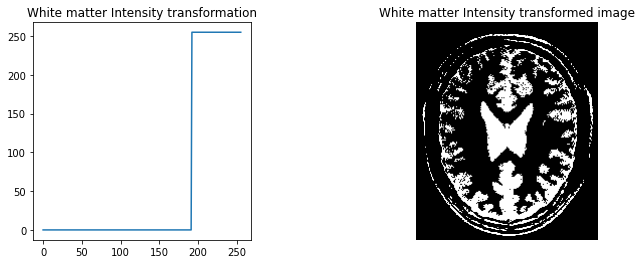

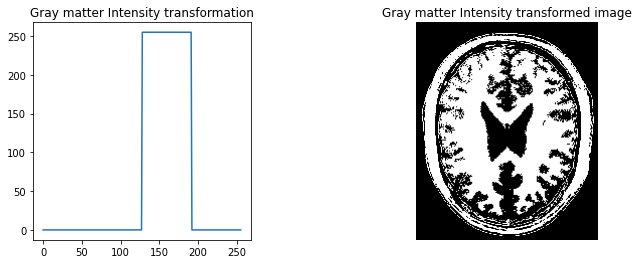

In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
img= cv.imread(r'Assignment Images/brain_proton_density_slice.png',cv.IMREAD_UNCHANGED)
assert img is not None
plt.figure()
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title("original image")
plt.show()
# White Matter
t1=np.linspace(0,0,192)
t2=np.linspace(0,255,0)
t3=np.linspace(255,255,64)
t=np.concatenate((t1,t2,t3),axis=0).astype(np.uint8)

fig,ax=plt.subplots(1,2,figsize=(12,4))
ax[0].plot(t)
ax[0].title.set_text("White matter Intensity transformation")
ax[0].set_aspect('equal')
assert len(t)==256
g=cv.LUT(img,t)
ax[1].imshow(cv.cvtColor(g, cv.COLOR_BGR2RGB))
ax[1].set_title("White matter Intensity transformed image")
ax[1].axis('off')
plt.show()
cv.namedWindow('Image',cv.WINDOW_AUTOSIZE)
cv.imshow('image',img)
cv.waitKey(0)
cv.imshow('image',g)
cv.waitKey(0)
cv.destroyAllWindows()

#Gray Matter
t1= np.linspace(0,0,128)
t2=np.linspace(0,255,0)
t3=np.linspace(255,255,64)
t4=np.linspace(255,0,0)
t5=np.linspace(0,0,64)
t=np.concatenate((t1,t2,t3,t4,t5),axis=0).astype(np.uint8)
assert len(t)==256
g=cv.LUT(img,t)
fig,ax=plt.subplots(1,2,figsize=(12,4))
ax[0].plot(t)
ax[0].title.set_text("Gray matter Intensity transformation")
ax[0].set_aspect('equal')
ax[1].imshow(cv.cvtColor(g, cv.COLOR_BGR2RGB))
ax[1].set_title("Gray matter Intensity transformed image")
ax[1].axis('off')
plt.show()
cv.namedWindow('Image',cv.WINDOW_AUTOSIZE)
cv.imshow('image',img)
cv.waitKey(0)
cv.imshow('image',g)
cv.waitKey(0)
cv.destroyAllWindows()


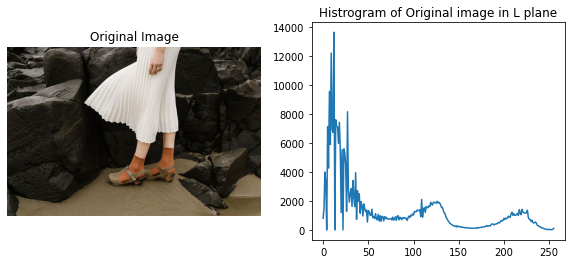

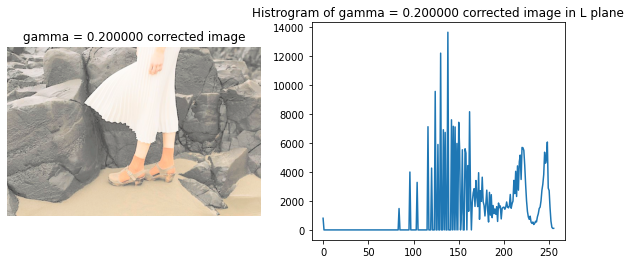

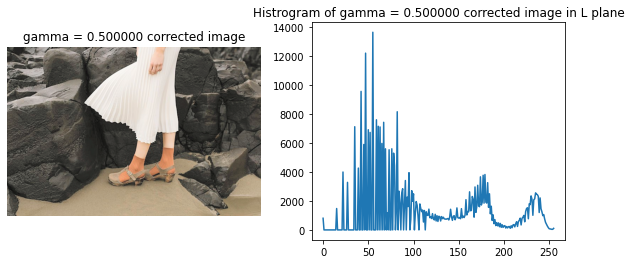

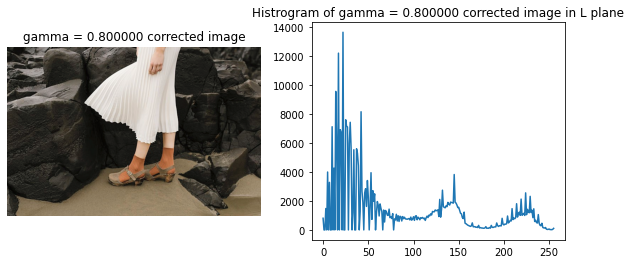

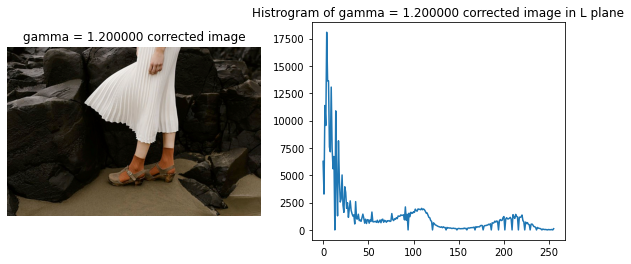

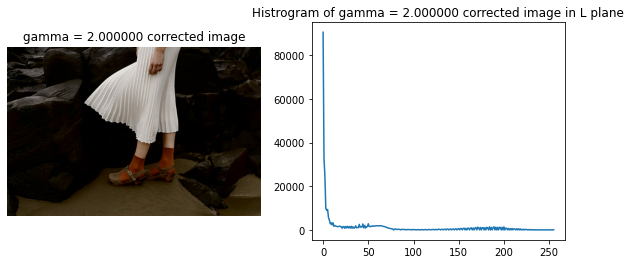

In [20]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
img= cv.imread(r'Assignment Images/highlights_and_shadows.jpg',cv.IMREAD_UNCHANGED)
assert img is not None
cv.namedWindow('Image',cv.WINDOW_AUTOSIZE)
cv.imshow('image',img)
cv.waitKey(0)

lab = cv.cvtColor(img, cv.COLOR_BGR2LAB)
l,a,b = cv.split(lab)
hist_img=cv.calcHist([lab],[0],None,[256],[0,256])
gamma = [0.2,0.5,0.8,1.2,2]
fig,ax=plt.subplots(1,2,figsize=(10,4))
ax[0].imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))
ax[0].set_title("Original Image")
ax[1].plot(hist_img)
ax[1].set_title("Histrogram of Original image in L plane")
ax[0].axis('off')
plt.show()

for i in range(len(gamma)):
    t= np.array([(p/255)**gamma[i]*255 for p in range(0,256)]).astype(np.uint8)
    g_l=cv.LUT(l,t)
    g_lab=cv.merge([g_l,a,b])
    new_img=cv.cvtColor(g_lab,cv.COLOR_LAB2BGR)
    hist_new=cv.calcHist([g_lab],[0],None,[256],[0,256])
    cv.imshow('gamma corrected image',new_img)
    cv.waitKey(0)
    cv.destroyAllWindows()

    fig,ax=plt.subplots(1,2,figsize=(10,4))
    ax[0].imshow(cv.cvtColor(new_img,cv.COLOR_BGR2RGB))
    ax[0].set_title(f"gamma = %f corrected image" % gamma[i])
    ax[1].plot(hist_new)
    ax[1].set_title(f"Histrogram of gamma = %f corrected image in L plane" % gamma[i])
    ax[0].axis("off")
    plt.show()
    


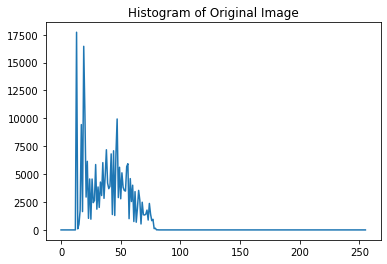

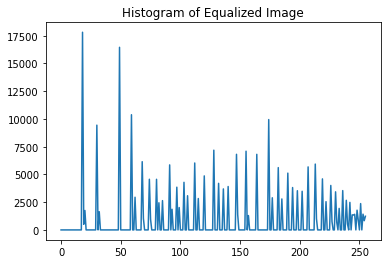

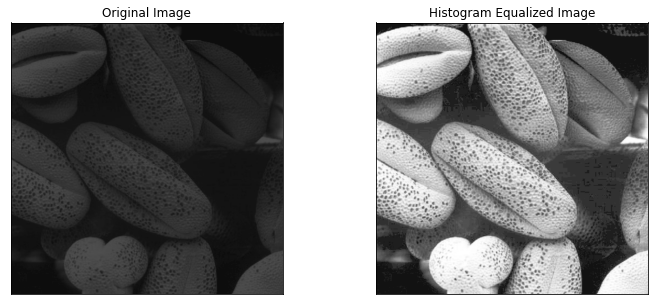

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

img = cv.imread(r"Assignment Images/shells.png",cv.IMREAD_GRAYSCALE)
img_flat=img.flatten()

def histogram_equalize(img,size):
    img_pixel_ =np.zeros((256,1)).astype(int)
    index_=np.linspace(0,255,256).reshape(256,1).astype(int)
    img_pixel=np.append(index_,img_pixel_,axis=1)
    for j in range(size):
        img_pixel[img[j],1]+=1 #increse the intensity count

    #Cumulative sum
    sum=0
    for i in range(256):
        sum+=img_pixel[i,1]
        img_pixel[i,1]=sum
        img_pixel[i,1]= round(img_pixel[i,1]*255/size)
    hist_img=np.zeros((1,size)).astype(np.uint8)
    for i in range(size):
        hist_img[0,i] = img_pixel[img[i],1]
    new_img=hist_img[0,:]
    return new_img



def histogram(img,size,title):
    img_pixel =np.zeros((256,1))
    index_=np.linspace(0,255,256).reshape(256,1).astype(int)
    img_pixel=np.append(index_,img_pixel,axis=1).astype(int)
    for j in range(size):
        img_pixel[int(img[j]),1]+=1
    plt.figure()
    plt.plot(img_pixel[:,0],img_pixel[:,1])
    plt.title(title)
    plt.show()
size=np.shape(img_flat)[0]
histogram(img_flat,size,"Histogram of Original Image") #plot histogram of original image
hist_image=histogram_equalize(img_flat,size)
histogram(hist_image,size,"Histogram of Equalized Image") #plot histogram of equalized image

cv.namedWindow('Image',cv.WINDOW_AUTOSIZE)
cv.imshow('image',img)
cv.waitKey(0)
cv.imshow('image',hist_image.reshape(500,500))
cv.waitKey(0)
cv.destroyAllWindows()

#plotting
fig,ax=plt.subplots(1,2,sharex='all',sharey='all',figsize=(12,5))
ax[0].imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))
ax[0].set_title("Original Image")
ax[0].set_xticks([]) , ax[0].set_yticks([])
ax[1].imshow(cv.cvtColor(hist_image.reshape(500,500),cv.COLOR_BGR2RGB))
ax[1].set_title("Histogram Equalized Image")
ax[1].set_xticks([]) , ax[1].set_yticks([])
plt.show()
for i in range(2):
    ax[i].axis("off")

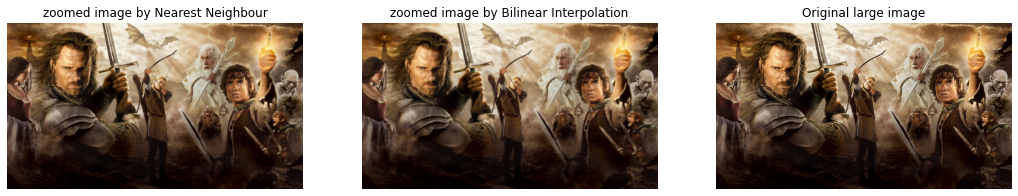

C:\Users\ASUS ZENBOOK\AppData\Local\Temp\ipykernel_14360\3294394388.py:41: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  difference_NN=np.subtract(zoom_img_NN,img)


In [40]:

import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

img_1_small=cv.imread(r'Assignment Images/im01small.png',cv.IMREAD_UNCHANGED)
img_2_small=cv.imread(r'Assignment Images/im02small.png',cv.IMREAD_UNCHANGED)
img_3_small=cv.imread(r'Assignment Images/im03small.png',cv.IMREAD_UNCHANGED)

img_1=cv.imread(r'Assignment Images/im01.png',cv.IMREAD_UNCHANGED)
img_2=cv.imread(r'Assignment Images/im02.png',cv.IMREAD_UNCHANGED)
img_3=cv.imread(r'Assignment Images/im03.png',cv.IMREAD_UNCHANGED)

#Zoom image by Nearest Neighbour
def zoomimage_NN(img,zoomfactor):
    zoom_img = cv.resize(img,None, fx = zoomfactor, fy = zoomfactor, interpolation = cv.INTER_NEAREST)
    return zoom_img

#Zoom image by Bilinear Interpolation
def zoomimage_BI(img,zoomfactor):
    zoom_img = cv.resize(img,None, fx = zoomfactor, fy = zoomfactor, interpolation = cv.INTER_LINEAR)
    return zoom_img
img_small=[img_1_small,img_2_small,img_3_small]
img=[img_1,img_2,img_3]

for i in range(len(img_small)):
    zoom_img_NN=zoomimage_NN(img_small[i],4)
    zoom_img_BI= zoomimage_BI(img_small[i],4)
    #Plotting
    fig,ax=plt.subplots(1,3,sharex='all',sharey='all',figsize=(18,6))
    ax[0].imshow(cv.cvtColor(zoom_img_NN,cv.COLOR_BGR2RGB))
    ax[0].set_title('zoomed image by Nearest Neighbour')
    ax[1].imshow(cv.cvtColor(zoom_img_BI,cv.COLOR_BGR2RGB))
    ax[1].set_title('zoomed image by Bilinear Interpolation')
    ax[2].imshow(cv.cvtColor(img[i],cv.COLOR_BGR2RGB))
    ax[2].set_title('Original large image')
    for i in range(3):
       ax[i].axis("off")
    plt.show()

    #Calculating SSD
    difference_NN=np.subtract(zoom_img_NN,img)
    squ_NN=np.square(difference_NN)
    SSD_NN=np.sum(squ_NN)

    difference_BI=np.subtract(zoom_img_NN,img)
    squ_BI=np.square(difference_BI)
    SSD_BI=np.sum(squ_BI)
    print('SSD Of Nearest Neighbour = ',SSD_NN)
    print('SSD of Bilinear Interpolation = ',SSD_BI)

